# 中值滤波

In [1]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats
import scipy.ndimage.filters as nd_filters
import time
from numpy.linalg import cholesky

In [2]:
gray = cv2.imread('../../datas/f4.jpg',0)
rgb = cv2.cvtColor(cv2.imread('../../datas/f4.jpg'),cv2.COLOR_BGR2RGB)
rows,cols,ch = rgb.shape

In [3]:
def noise_pepper(img,a):
    m,n = img.shape[0],img.shape[1]
    R = np.random.randn(m,n)
    dst = np.zeros(img.shape,dtype=np.float64)
    rgb = np.float64(img)
#     df_R = DataFrame(R)
    idx = R <= a
    dst[idx] = rgb[idx]
    return dst

In [19]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [20]:
src_noise_pepper = noise_pepper(gray,0.01)
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255
src_noise_gray[src_noise_gray < 0] = 0
src_noise_gray[src_noise_gray > 255] = 255
src_noise_gray = src_noise_gray.astype(np.uint8)

In [5]:
def median_filter(src,ksize):
    center = ksize // 2
    dst = np.zeros_like(src)
    
    rows,cols = src.shape[0],src.shape[1]
    for i in range(rows):
        for j in range(cols):
            temp = []
            for z in range(ksize):
                if i + z - center < 0 or i + z - center > rows - 1:
                    for c in range(ksize):
                        temp.append(0)
                else:
                    if j + z - center < 0 or j + z - center > cols - 1:
                        temp.append(0)
                    else:
                        for k in range(ksize):
                            temp.append(src[i+z-center,j+z-center])
            temp.sort()
            dst[i,j] = temp[len(temp) // 2]
            del temp
    return dst

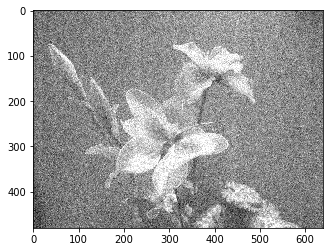

In [26]:
plt.imshow(src_noise_gray,'gray')

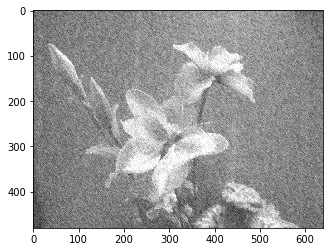

In [25]:
dst = median_filter(src_noise_gray,3)
plt.imshow(dst,'gray')

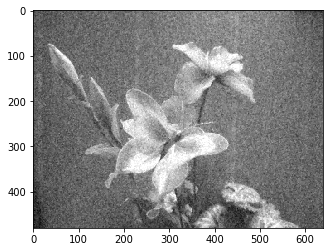

In [23]:
dst_c = cv2.medianBlur(src_noise_gray,3)
plt.imshow(dst_c,'gray')